Soccer Stats for DS3000 Project

In [1]:
import pandas as pd
import numpy as np
from scipy import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
top5_df = pd.read_csv('top5_leagues_player.csv')
games_df = pd.read_csv('games.csv')
players_df = pd.read_csv('players.csv')
valuations_df = pd.read_csv('player_valuations.csv')
appearances_df = pd.read_csv('appearances.csv')

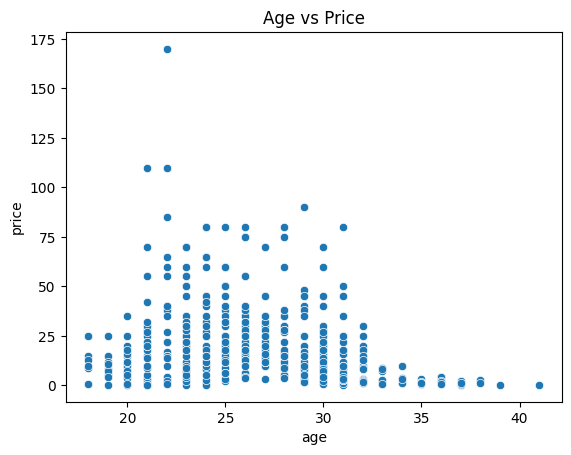

[Text(0.5, 1.0, 'Height vs Price')]

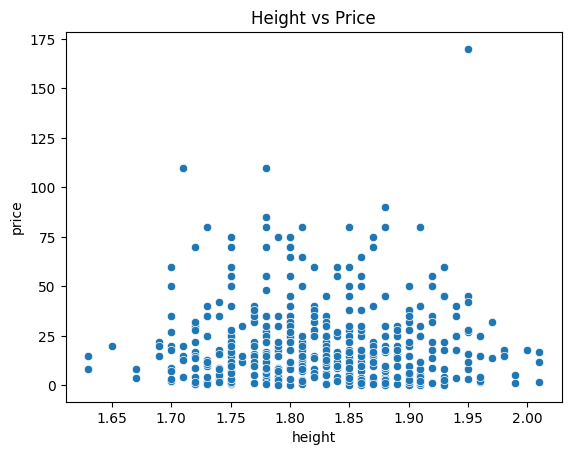

In [3]:
prime_df = top5_df[top5_df['league']=='EPL']
sns.scatterplot(data=prime_df, x='age', y='price').set(title='Age vs Price')
plt.show()
sns.scatterplot(data=prime_df, x='height', y='price').set(title='Height vs Price')

       highest_market_value_in_eur  player_id
0                       10000000.0        598
1                       12000000.0        670
2                        2750000.0       1323
3                       10500000.0       3195
4                       17000000.0       3259
...                            ...        ...
30297                   10000000.0     371851
30298                     350000.0     537171
30299                    4500000.0     586756
30300                      75000.0     704692
30301                     300000.0     925584

[30302 rows x 2 columns]


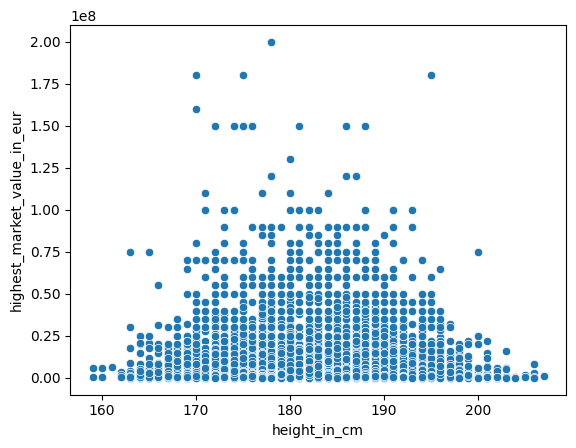

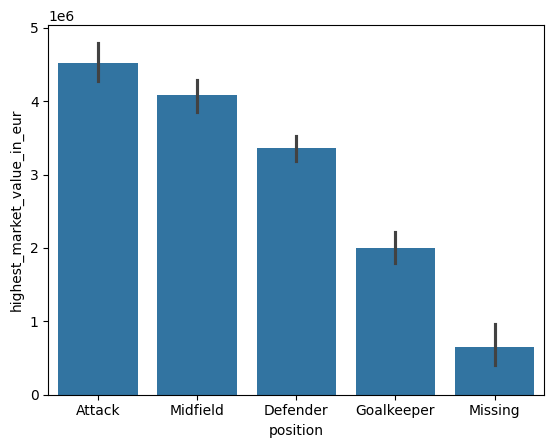

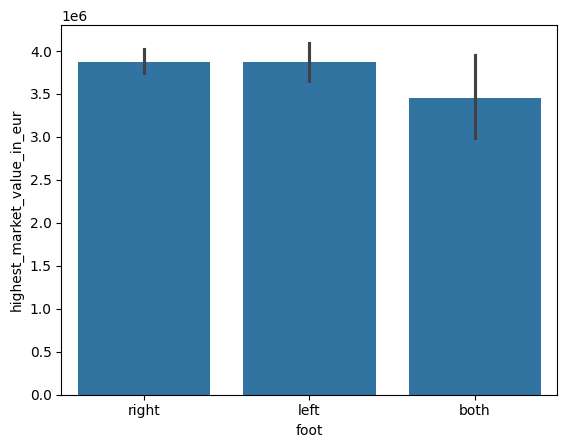

       highest_market_value_in_eur  player_id  yellow_cards  red_cards  goals  \
0                       10000000.0        598           NaN        NaN    NaN   
1                       12000000.0        670           NaN        NaN    NaN   
2                        2750000.0       1323           NaN        NaN    NaN   
3                       10500000.0       3195           NaN        NaN    NaN   
4                       17000000.0       3259           NaN        NaN    NaN   
...                            ...        ...           ...        ...    ...   
30297                   10000000.0     371851           NaN        NaN    NaN   
30298                     350000.0     537171           NaN        NaN    NaN   
30299                    4500000.0     586756           NaN        NaN    NaN   
30300                      75000.0     704692           NaN        NaN    NaN   
30301                     300000.0     925584           NaN        NaN    NaN   

       assists  
0         

<Axes: xlabel='goals', ylabel='highest_market_value_in_eur'>

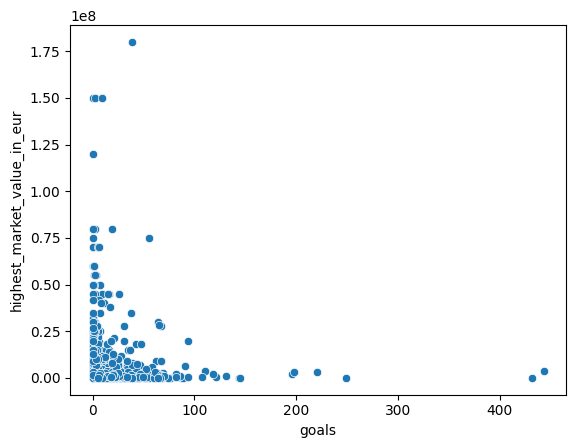

In [4]:
mrkt_value_df = players_df[['highest_market_value_in_eur', 'player_id']]
print(mrkt_value_df)

players_df = players_df[(players_df['height_in_cm']>100)]
sns.scatterplot(data=players_df, x='height_in_cm', y='highest_market_value_in_eur')
plt.show()

sns.barplot(data=players_df, x='position', y='highest_market_value_in_eur')
plt.show()

sns.barplot(data=players_df, x='foot', y='highest_market_value_in_eur')
plt.show()

game_stats = appearances_df[['player_id', 'yellow_cards', 'red_cards', 'goals', 'assists']]
game_stats = game_stats.groupby(game_stats['player_id']).aggregate('sum')
game_stats = game_stats.sort_values('player_id')

game_stats = mrkt_value_df.join(game_stats)
print(game_stats)
print(game_stats['player_id'])
sns.scatterplot(data=game_stats, x='goals', y='highest_market_value_in_eur')